# CA2 Statistical Techniques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from scipy.stats import ttest_ind, t
from pydataset import data

from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Task 1:
Load the dataset Q1.csv. It contains the exam scores (in percentages) of a sample of 50 students from a Dublin secondary school.

1. Find and comment on important summary statistics and produce an appropriate plot to summarise the dataset.
2. One of the teachers is concerned about the performance of the students in the school. She suspects that their performance may be below the reported national average of 70%. Does the data show that her concerns are justified? Use a significance level of alpha = 0.05.
3. Produce and comment on an appropriate plot to illustrate your findings.

#### Data Set Loadingpresent the national mean

In [2]:
df = pd.read_csv("Q1.csv")

In [3]:
df

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43
5,73.16
6,81.30
7,71.37
8,65.35
9,80.05


#### Summary Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exam_score  50 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


There are 50 records of a float64 variable in the database.

In [5]:
df.isnull().sum()

exam_score    0
dtype: int64

In [6]:
df.describe()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


#### Data Description
 - Mean = 68.7356
 - Std  = 9.75
 - Min Value = 48.73
 - Max Value = 87.36

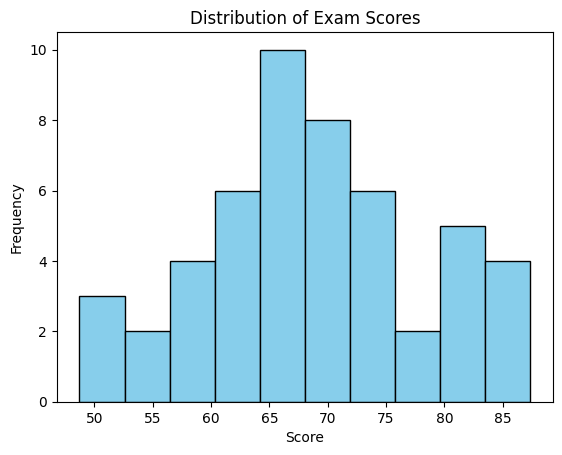

In [7]:
# Creating a histogram to visualize the distribution of scores
plt.hist(df['exam_score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

#### Hypothesis Test - t-test
To determine if the teacher's concerns are justified, we will perform the hypothesis test:

1. **Hypotheses**:
   - Null Hypothesis (H0): The mean score is equal to or greater than 70%.
   - Alternative Hypothesis (H1): The mean score is less than 70%.

2. **Significance Level (α)**: α = 0.05.

3. **Test Statistic**: We will use the Student's t-test for a sample.

4. **Decision Criterion**: If the calculated p-value is less than the significance level (α = 0.05), we will reject the null hypothesis in favor of the alternative hypothesis.ternativa.

In [8]:
# Defining the national mean
mean_national = 70

# Defining the significance level
alpha = 0.05

In [9]:
# Performing the hypothesis test
t_statistic, p_value = stats.ttest_1samp(df['exam_score'], mean_national)
p_value

0.36364597032062806

### Since the p-value (0.3636) is greater than alpha (0.05), there is not enough evidence to conclude that the average scores are below the national mean of 70%.

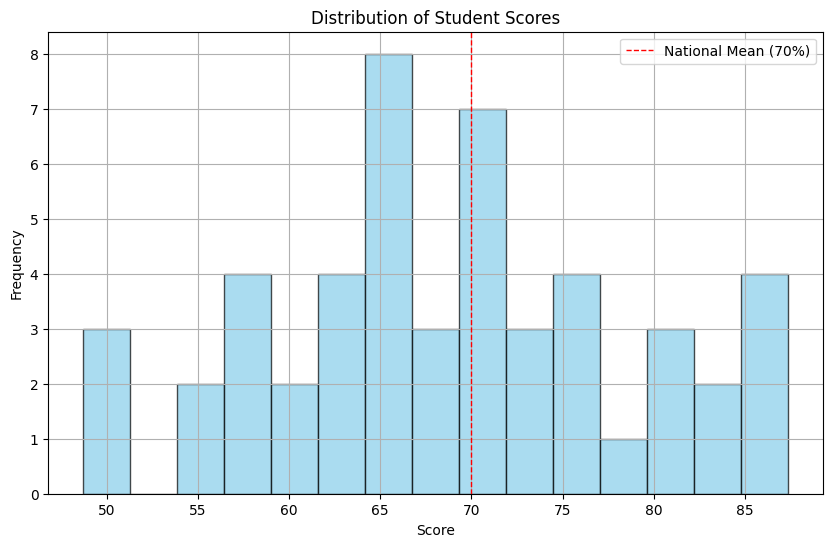

In [10]:
# Creating the histogram
plt.figure(figsize=(10, 6))
plt.hist(df, bins=15, color='skyblue', edgecolor='black', alpha=0.7)

# Adding a vertical line to represent the national mean
plt.axvline(mean_national, color='red', linestyle='dashed', linewidth=1, label='National Mean (70%)')

# Adding legends and title
plt.title('Distribution of Student Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

# Displaying the graph
plt.grid(True)
plt.show()


#### Histogram
Histogram of student scores, highlighting the national mean of 70%.

- The histogram shows the distribution of student scores, highlighting the concentration of scores along the horizontal axis.
- The dashed vertical line in red represents the national mean of 70%, aiding in visualizing the student scores and positioning relative to the national mean.
- It is observed that the majority of scores are below the national mean.
- The distribution of scores appears to be skewed to the left, suggesting that most students achieved lower scores.

### Task 2
Load the diamonds dataset, and print the first 5 rows. The color variable refers to the colour of the diamond, with categories from “D” to “J”. Colourless diamonds are considered better than diamonds with a yellow tint. Diamonds from “D” to “F” are considered colourless, and diamonds from colour “G” to “J” are not considered colourless (that is, they have a very faint colour).

1. Create a new binary variable in the dataframe called “colourless” which records 1 in rows with colourless diamonds and 0 otherwise.
2. Perform an appropriate hypothesis test to determine whether there is any association between the clarity of a diamond and whether it is colourless or not. Use a significance level of alpha = 0.01.
3. Produce and comment on an appropriate plot to illustrate your findings.
4. Find and interpret 90% confidence intervals for both the mean price of colourless diamonds and the mean price of non-colourless diamnds.


In [11]:
df = pd.read_csv("diamonds.csv")

In [12]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Variable colourless
Creating the new binary variable "colourless" here color D, E and F = 1 and others colors = 0

In [14]:
df['colourless'] = df['color'].apply(lambda x: 1 if x in ['D', 'E', 'F'] else 0)

df

,carat,cut,color,clarity,depth,table,price,x,y,z,colourless
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,1
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,1
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0


#### Prices Boxplot

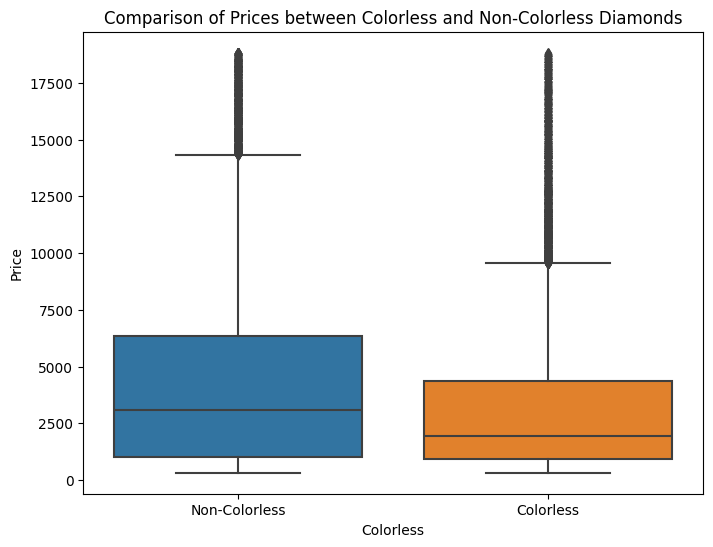

In [15]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='colourless', y='price', data=df)
plt.title('Comparison of Prices between Colorless and Non-Colorless Diamonds')
plt.xlabel('Colorless')
plt.ylabel('Price')
plt.xticks([0, 1], ['Non-Colorless', 'Colorless'])
plt.show()

#### 90% Confidence Interval

In [18]:
# Calculate mean and standard deviation of prices for colorless diamonds
colorless_prices = df[df['colourless'] == 1]['price']
mean_colorless = np.mean(colorless_prices)
std_colorless = np.std(colorless_prices, ddof=1)

# Calculate mean and standard deviation of prices for non-colorless diamonds
non_colorless_prices = df[df['colourless'] == 0]['price']
mean_non_colorless = np.mean(non_colorless_prices)
std_non_colorless = np.std(non_colorless_prices, ddof=1)

# Sample size
n_colorless = len(colorless_prices)
n_non_colorless = len(non_colorless_prices)

# Calculate the standard error (SE) 
se_colorless = std_colorless / np.sqrt(n_colorless)
se_non_colorless = std_non_colorless / np.sqrt(n_non_colorless)

# Degrees of freedom
df_colorless = n_colorless - 1
df_non_colorless = n_non_colorless - 1

In [19]:
# 90% confidence interval for colorless and non-colorless diamonds
ci_colorless = t.interval(0.90, df_colorless, loc=mean_colorless, scale=se_colorless)
ci_non_colorless = t.interval(0.90, df_non_colorless, loc=mean_non_colorless, scale=se_non_colorless)

# Print the confidence intervals
print("90% Confidence Interval for the Mean Price of Colorless Diamonds:", ci_colorless)
print("90% Confidence Interval for the Mean Price of Non-Colorless Diamonds:", ci_non_colorless)

90% Confidence Interval for the Mean Price of Colorless Diamonds: (3301.857515879007, 3373.661286296071)
90% Confidence Interval for the Mean Price of Non-Colorless Diamonds: (4448.778068284649, 4533.682076903305)


#### Difference in Average Prices
The range for the average price of colorless diamonds between 3301.86 and 3373.66 is below the range for the average price of non-colorless diamonds between 4448.78 and 4533.68. Suggesting that on average, colorless diamonds tend to be cheaper than non-colorless diamonds.

#### Statistical Significance
The confidence intervals do not overlap, suggesting a statistical difference between the two groups. That is, there is a real difference in the average prices between colorless and non-colorless diamonds.

### Task 3

Load the PlantGrowth dataset from the pydataset library. It contains the results of a small study comparing the yields of plants obtained under a control and under two different treatment conditions.
1. Find and comment on important summary statistics by treatment and produce an appropriate plot to summarise the dataset.
2. Conduct an appropriate hypothesis test to see if there is evidence of a difference between the three means (that is, the control and the two treatments). Use a significance level of alpha = 0.05.
3. If there is evidence of a difference between the three means, find and comment on where this difference maybe.


In [ ]:
# Load the PlantGrowth dataset
df = data('PlantGrowth')

In [ ]:
# Display the first few rows of the dataset
df.head()

In [ ]:
df.info()

#### Summary Statistics

In [ ]:
# Calculate summary statistics by treatment
summary_stats = df.groupby('group')['weight'].describe()

# Display the summary statistics
print(summary_stats)

In [ ]:
# Create a boxplot to visualize the distribution of weights by treatment
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='weight', data=df)
plt.title('Distribution of Plant Weights by Treatment')
plt.xlabel('Treatment Group')
plt.ylabel('Weight')
plt.show()

**Treatment 1:** The average weight of the plants is 4.661 with a median of 4.55. The standard deviation is 0.794, indicating a moderate amount of variability in plant weights. The minimum observed weight is 3.59, and the maximum weight is 6.03.

**Treatment 2:** The average weight of the plants is 5.526 with a median of 5.435. The standard deviation is 0.443, indicating less variability compared to Treatment 1. The minimum observed weight is 4.92, and the maximum weight is 6.31.

**Control:** The average weight of the plants in the control group is 5.032 with a median of 5.155. The standard deviation is 0.583, indicating relatively low variability. The minimum observed weight is 4.17, and the maximum weight is 6.11.

#### Hypothesis Test - t-test
3 Independent t-tests, one for each pair of groups, to test for differences among the three means.
- Control vs. Treatment 1
- Control vs. Treatment 2
- Treatment 1 vs. Treatment 2
- Alpha = 0.05

In [ ]:
# Separating the data into groups
control = df[df['group'] == 'ctrl']['weight']
treatment1 = df[df['group'] == 'trt1']['weight']
treatment2 = df[df['group'] == 'trt2']['weight']

# Performing t-tests between the groups
t_statistic_ctrl_vs_trt1, p_value_ctrl_vs_trt1 = ttest_ind(control, treatment1)
t_statistic_ctrl_vs_trt2, p_value_ctrl_vs_trt2 = ttest_ind(control, treatment2)
t_statistic_trt1_vs_trt2, p_value_trt1_vs_trt2 = ttest_ind(treatment1, treatment2)

In [ ]:
print(p_value_ctrl_vs_trt1)
print(p_value_ctrl_vs_trt2)
print(p_value_trt1_vs_trt2)

### The results

For Alpha = 0.05

**Control (ctrl) vs. Treatment 1 (trt1):** The p-value is greater than alpha. Therefore, there is no evidence of difference between the means of control and treatment 1.

**Control (ctrl) vs. Treatment 2 (trt2):** The p-value is less than alpha. Therefore, there is evidence of difference between the means of control and treatment 2.

**Treatment 1 (trt1) vs. Treatment 2 (trt2):** The p-value is less than alpha. Therefore, there is evidence of difference between the means of treatment 1 and treatment 2.